In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
from sklearn import preprocessing 
import payments_manager as pm

#pm.reset() #pm.help()
#pm.init() #debug=True)
cr_cp = pm.df('cr_cp')
fe_cp = pm.df('fe_cp')
#cr_cp.info()
#fe_cp.info()

df_jo = pm.df('df_jo')
#df_jo.info()
df_jo = pm.sort("df_jo", ["id_cr"]).reset_index()
df_jo = df_jo.drop(columns=['index'])

#df_jo = df_jo.drop(columns=['Mes_created_at'])
df_jo_cp = df_jo.copy()
df_jo_cp['cr_received_date'] = df_jo_cp.cash_request_received_date
#df_jo.info()

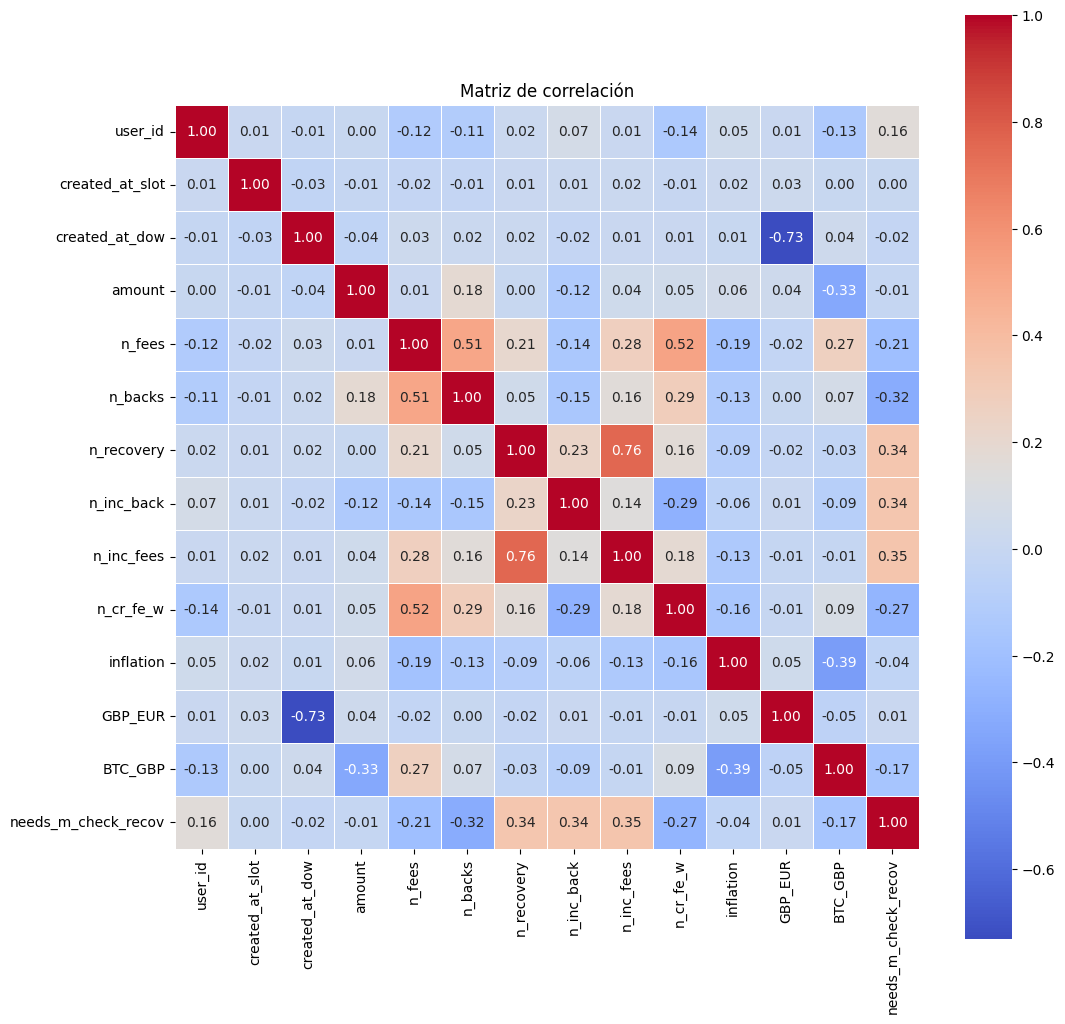

Variables altamente correlacionadas con otras:


[]

In [5]:
df = pm.df('df_hyper')
#df = df.drop(columns=['cash_request_received_date'])

d_list = list(df.select_dtypes(include=['datetime64']).columns)
for date in d_list:
    df[date] = pd.to_datetime(df[date]).dt.strftime('%Y%m%d').astype(float)
df_corr = df.select_dtypes(include=['number'])
matriz_corr = df_corr.corr()
plt.figure(figsize=(12, 12)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in matriz_corr.columns:
    if any((matriz_corr[column].abs() > threshold) & (matriz_corr.index != column)):
        to_drop.append(column)
print(f"Variables altamente correlacionadas con otras:")
display(to_drop)

In [6]:
df_t = pm.df('df_jo') 
df_t = df_t[df_t['user_id'] == 47]
df_t[['created_at', 'created_at_dow','BTC_GBP']].head(15)

,created_at,created_at_dow,BTC_GBP
0,2019-11-19 13:57:53.511561,1,6347.577148
53,2019-12-12 14:14:14.131479,3,5376.049805
1143,2020-04-16 08:42:15.429083,3,5699.457031
1771,2020-05-15 16:04:10.449840,4,7706.900391
1772,2020-05-15 16:04:10.449840,4,7706.900391
1773,2020-05-15 16:04:10.449840,4,7706.900391
1774,2020-05-15 16:04:10.449840,4,7706.900391
1775,2020-05-15 16:04:10.449840,4,7706.900391
11530,2020-08-05 09:34:16.818322,2,8948.752930
11531,2020-08-05 09:34:16.818322,2,8948.752930


   created_at_dow         mean       median          std  count
0               0  8369.576582  8319.000977   986.328260   4164
1               1  8374.822038  8429.702148  1032.680000   5480
2               2  8309.034022  8260.065430  1001.433320   5505
3               3  8326.950493  8435.708984  1068.126560   5170
4               4  8449.301559  8473.341797  1017.549460   5283
5               5  8490.383421  8589.287109  1104.373679   3856
6               6  8446.969141  8441.809570  1051.136364   2634


/tmp/ipykernel_77627/1063478056.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='created_at_dow', y='mean', data=cohorts, palette='viridis')


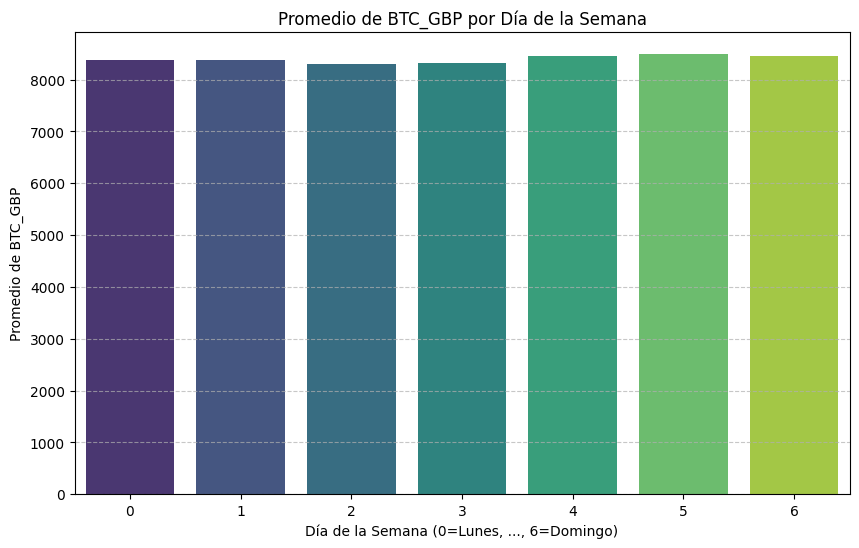

/tmp/ipykernel_77627/1063478056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='created_at_dow', y='BTC_GBP', data=df_t, palette='coolwarm')


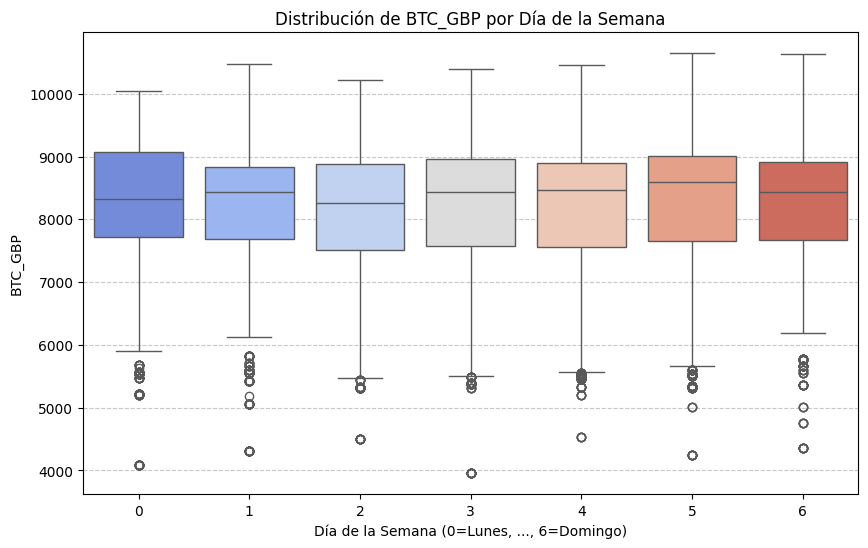

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_t = pm.df('df_jo') 
#df_t.info()
# Crear cohortes basadas en el día de la semana y calcular estadísticas
cohorts = df_t.groupby('created_at_dow')['BTC_GBP'].agg(['mean', 'median', 'std', 'count']).reset_index()
print(cohorts)

plt.figure(figsize=(10, 6))
sns.barplot(x='created_at_dow', y='mean', data=cohorts, palette='viridis')

# Configuración del gráfico
plt.title('Promedio de BTC_GBP por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, ..., 6=Domingo)')
plt.ylabel('Promedio de BTC_GBP')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='created_at_dow', y='BTC_GBP', data=df_t, palette='coolwarm')

# Configuración del gráfico
plt.title('Distribución de BTC_GBP por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, ..., 6=Domingo)')
plt.ylabel('BTC_GBP')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

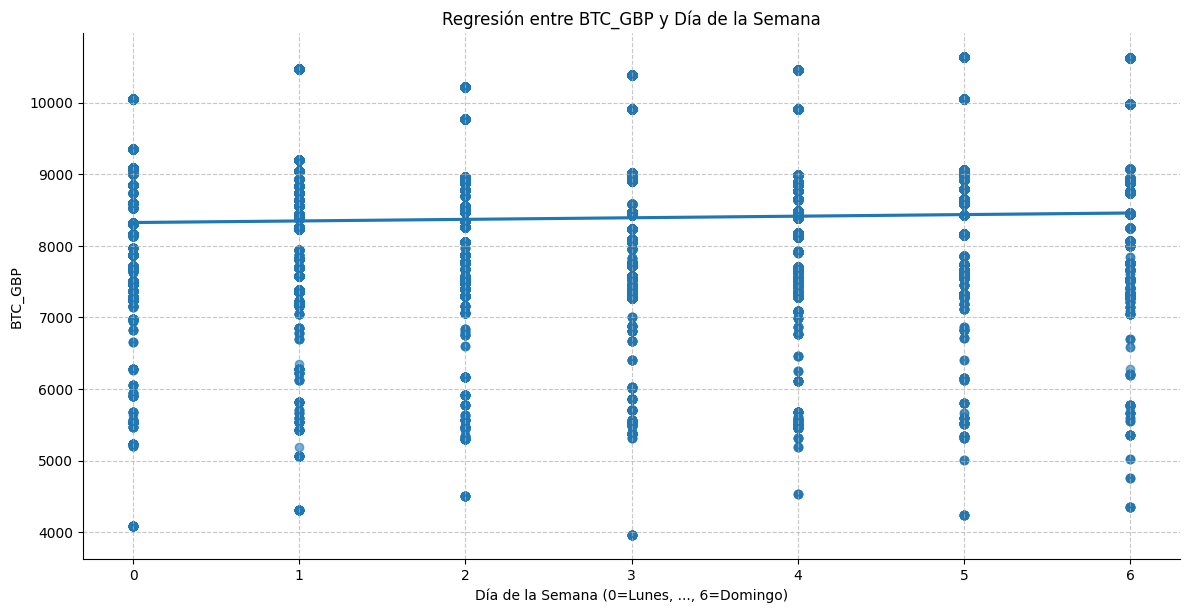

In [8]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='created_at_dow', y='BTC_GBP', data=df_t, aspect=2, height=6, scatter_kws={'alpha':0.6})

# Configuración del gráfico
plt.title('Regresión entre BTC_GBP y Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, ..., 6=Domingo)')
plt.ylabel('BTC_GBP')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()
